In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *
import statistics

In [19]:
# df = pd.read_csv('../(Data) Last Year/training/prices_round_1_day_0.csv', delimiter=';')
df = pd.read_csv('../(Data) Last Year/training/prices_round_2_day_0.csv', delimiter=';')
df.fillna(0, inplace=True)

In [20]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,PEARLS,9998,1,9995.0,30.0,0.0,0.0,10005,30,0.0,0.0,0.0,0.0,10001.5,0.0
1,0,0,COCONUTS,8113,205,0.0,0.0,0.0,0.0,8116,205,0.0,0.0,0.0,0.0,8114.5,0.0
2,0,0,BANANAS,4893,1,4892.0,30.0,0.0,0.0,4899,30,0.0,0.0,0.0,0.0,4896.0,0.0
3,0,0,PINA_COLADAS,15225,82,0.0,0.0,0.0,0.0,15228,82,0.0,0.0,0.0,0.0,15226.5,0.0
4,0,100,COCONUTS,8113,192,0.0,0.0,0.0,0.0,8115,70,8116.0,122.0,0.0,0.0,8114.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,999800,BANANAS,4869,27,0.0,0.0,0.0,0.0,4876,27,0.0,0.0,0.0,0.0,4872.5,123648.0
39996,0,999900,COCONUTS,8002,190,0.0,0.0,0.0,0.0,8005,190,0.0,0.0,0.0,0.0,8003.5,432688.0
39997,0,999900,PEARLS,9996,2,9995.0,21.0,0.0,0.0,10004,2,10005.0,21.0,0.0,0.0,10000.0,-408.0
39998,0,999900,BANANAS,4870,23,0.0,0.0,0.0,0.0,4876,2,4877.0,21.0,0.0,0.0,4873.0,121460.0


Text(0, 0.5, 'Mid Price')

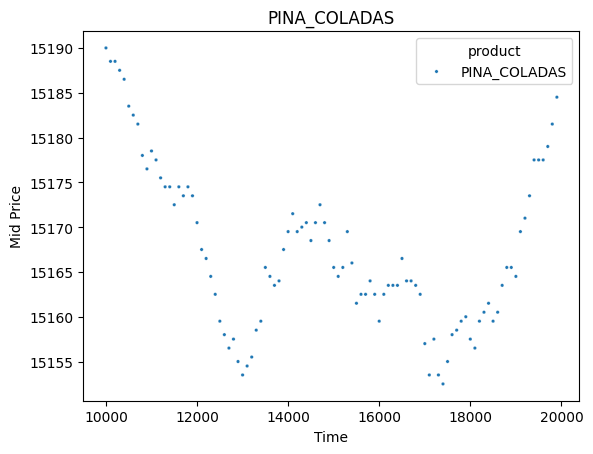

In [32]:
sns.scatterplot(data=df[df['product'] == 'PINA_COLADAS'].iloc[100:200], x='timestamp', y='mid_price', hue='product', s = 6)
plt.title('PINA_COLADAS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [24]:
def find_average(row):
    try:
        return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
    row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
    row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                    row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])
    except:
        return 0

df['avg_price'] = df.apply(find_average, axis=1)

In [29]:
# calculate lin reg of 40 points

# we want to check if our prediction of the timestamp in 10 mins time is 
def check_validity():
    # success_lst = []
    # for test in range(2, 20):
    past_vals = 15
        
    df_star = df[df["product"] == "PINA_COLADAS"]
    df_star = df_star.reset_index()
    # print(df_star)
    success = 0
    lst = np.array([])
    x = np.array([i for i in range(past_vals)])
    time = []
    gradient_lst = []
    for index, row in df_star.iterrows():
        if index == len(df_star) -1:
            break
        curr_avg = row["avg_price"]
        curr_mid = row["mid_price"]
        next_mid = df_star.iloc[index+1]["mid_price"]

        if len(lst) < past_vals:
            lst = np.append(lst, curr_avg)
            continue
        else:
            lst = lst[1:]
            lst = np.append(lst, curr_avg)
            
        
        gradient, c = np.polyfit(x, lst, 1)
        time.append(row["timestamp"])
        gradient_lst.append(lst.tolist())

        if len(lst) >= past_vals:
            diff_lst = []
            for i in range(past_vals):
                c_avg = df_star.iloc[index-i]["mid_price"]
                c_lin_reg = gradient * (past_vals - i) + c
                diff = c_lin_reg - c_avg
                diff_lst.append(diff)


            sd = statistics.stdev(diff_lst, 0)
        else:
            sd = 1
        # df["lin_reg_avg_price"] = df
        # print(c, gradient)
        # predicting a down trend
        # if curr_avg - curr_mid < 0:
        pred = (past_vals+1) * gradient + c
        pred = float(round(pred * 2) / 2)
        # give a buffer
        # print(f"pred: {pred}, next_mid: {float(next_mid)}")
        print(f"sd: {sd}")
        if next_mid < (pred + 0.9 * sd) and next_mid > (pred - 0.9 * sd):
            print(f"pred: {pred}, next_mid: {next_mid}")
            success += 1

        # if pred == next_mid:
        #     success += 1

            # if gradient < 0:
            #     if next_mid < curr_mid:
            #         success += 1
            
            # # if curr_avg - curr_mid > 0:
            # if gradient > 0:
            #     if next_mid > curr_mid:
            #         success += 1
        # success_lst.append(success)
        # print(test)
        # return success
        
    
    # return gradient_lst, time
    return success
# time, gradient_lst = check_validity()
# gradient_lst, time = check_validity()
success = check_validity()

      index  day  timestamp       product  bid_price_1  bid_volume_1  \
0         3    0          0  PINA_COLADAS        15225            82   
1         5    0        100  PINA_COLADAS        15223           109   
2         8    0        200  PINA_COLADAS        15226             7   
3        13    0        300  PINA_COLADAS        15224            84   
4        19    0        400  PINA_COLADAS        15220           105   
...     ...  ...        ...           ...          ...           ...   
9995  39983    0     999500  PINA_COLADAS        15004            95   
9996  39987    0     999600  PINA_COLADAS        15002           107   
9997  39991    0     999700  PINA_COLADAS        15003            77   
9998  39993    0     999800  PINA_COLADAS        15010            23   
9999  39999    0     999900  PINA_COLADAS        15011           108   

      bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0             0.0           0.0          0.0           0.0  

In [30]:
success/10000

0.3856

In [ ]:
# the idea is to have a long lin-reg, probs 25 data points or so
# then have a second one which dictates how heavily weighted the first one should be
# could perhaps even perform a kalman filter on it

# calculate lin reg of 40 points

# we want to check if our prediction of the timestamp in 10 mins time is 
def check_validity1():
    # success_lst = []
    # for test in range(2, 20):
    past_vals = 15
    past_vals1 = 5
        
    df_star = df[df["product"] == "PINA_COLADAS"]
    df_star = df_star.reset_index()
    # print(df_star)
    success = 0
    lst = np.array([])
    lst1 = np.array([])
    x = np.array([i for i in range(past_vals)])
    x1 = np.array([i for i in range(past_vals1)])

    time = []
    gradient_lst = []
    for index, row in df_star.iterrows():
        if index == len(df_star) -1:
            break
        curr_avg = row["avg_price"]
        curr_mid = row["mid_price"]
        next_mid = df_star.iloc[index+1]["mid_price"]

        if len(lst) < past_vals:
            lst = np.append(lst, curr_avg)
            continue
        else:
            lst = lst[1:]
            lst = np.append(lst, curr_avg)
            
        if len(lst1) < past_vals1:
            lst1 = np.append(lst1, curr_avg)
            continue
        else:
            lst1 = lst1[1:]
            lst1 = np.append(lst1, curr_avg)
        
        gradient, c = np.polyfit(x, lst, 1)
        gradient1, c1 = np.polyfit(x1, lst1, 1)
        time.append(row["timestamp"])
        gradient_lst.append(lst.tolist())

        if len(lst) >= past_vals:
            diff_lst = []
            for i in range(past_vals):
                c_avg = df_star.iloc[index-i]["mid_price"]
                c_lin_reg = gradient * (past_vals - i) + c
                diff = c_lin_reg - c_avg
                diff_lst.append(diff)


            sd = statistics.stdev(diff_lst, 0)
        else:
            sd = 1
        # df["lin_reg_avg_price"] = df
        # print(c, gradient)
        # predicting a down trend
        # if curr_avg - curr_mid < 0:
        pred = (past_vals+1) * gradient + c
        pred = float(round(pred * 2) / 2)
        # give a buffer
        # print(f"pred: {pred}, next_mid: {float(next_mid)}")
        print(f"sd: {sd}")
        if next_mid < (pred + 0.9 * sd) and next_mid > (pred - 0.9 * sd):
            print(f"pred: {pred}, next_mid: {next_mid}")
            success += 1

        # if pred == next_mid:
        #     success += 1

            # if gradient < 0:
            #     if next_mid < curr_mid:
            #         success += 1
            
            # # if curr_avg - curr_mid > 0:
            # if gradient > 0:
            #     if next_mid > curr_mid:
            #         success += 1
        # success_lst.append(success)
        # print(test)
        # return success
        
    
    # return gradient_lst, time
    return success
# time, gradient_lst = check_validity()
# gradient_lst, time = check_validity()
success = check_validity()